Tutorial from: https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html




In [16]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Hamiltonian is: 
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.5 -0.5]
 [-0.5  0.5]]


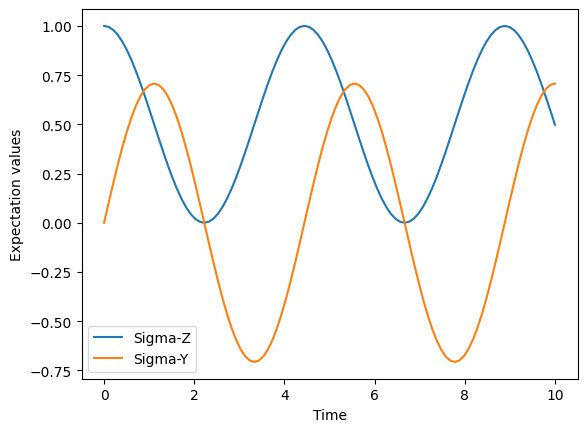

In [17]:
delta = 1.0   # Default 1, 1, 1
gamma = 1.0  
Omega = 1.0

# Make Hamiltonian
sigma_z = np.matrix(([1,0],[0,-1]))
sigma_x = np.matrix(([0,1],[1,0]))
sigma_ = np.matrix(([0,0],[1,0]))      # changed
    
# Hamiltonian; use Qobj function to convert a numpy matrix into quantum object for QuTiP
H = Qobj(-delta/2*sigma_z - Omega/2*sigma_x)

print("Hamiltonian is: \n", H)

psi0 = basis(2, 0)
times = np.linspace(0.0, 10.0, 100)
result = sesolve(H, psi0, times, [sigmaz(), sigmay()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y")) 
plt.show() 


## Tutorial code below

### 1. Unitary evolution

In [18]:
H = 2*np.pi * 0.1 * sigmax()
print("Tutorial H: \n", H)
psi0 = basis(2, 0)
times = np.linspace(0.0, 10.0, 20)
result = sesolve(H, psi0, times, [sigmaz()])
result = sesolve(H, psi0, times, [sigmaz(), sigmay()])
result.expect 

Tutorial H: 
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         0.62831853]
 [0.62831853 0.        ]]


[array([ 1.        ,  0.78914057,  0.24548559, -0.40169513, -0.8794735 ,
        -0.98636142, -0.67728219, -0.08258023,  0.54694721,  0.94581685,
         0.94581769,  0.54694945, -0.08257765, -0.67728015, -0.98636097,
        -0.87947476, -0.40169736,  0.24548326,  0.78913896,  1.        ]),
 array([ 0.00000000e+00, -6.14212640e-01, -9.69400240e-01, -9.15773457e-01,
        -4.75947849e-01,  1.64593874e-01,  7.35723339e-01,  9.96584419e-01,
         8.37167094e-01,  3.24700624e-01, -3.24698160e-01, -8.37165632e-01,
        -9.96584633e-01, -7.35725221e-01, -1.64596567e-01,  4.75945525e-01,
         9.15772479e-01,  9.69400830e-01,  6.14214701e-01,  2.77159958e-06])]

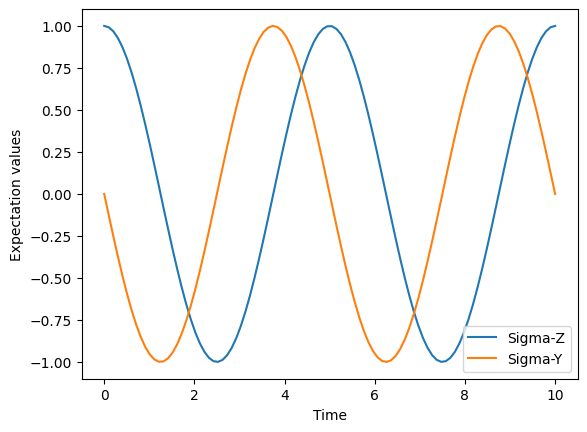

In [19]:
H = 2*np.pi * 0.1 * sigmax()

psi0 = basis(2, 0)

times = np.linspace(0.0, 10.0, 100)

result = sesolve(H, psi0, times, [sigmaz(), sigmay()])

fig, ax = plt.subplots()

ax.plot(result.times, result.expect[0]) 

ax.plot(result.times, result.expect[1]) 

ax.set_xlabel('Time') 

ax.set_ylabel('Expectation values') 

ax.legend(("Sigma-Z", "Sigma-Y")) 

plt.show() 


In [20]:
times = [0.0, 1.0]

result = sesolve(H, psi0, times, [])

result.states 

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.80901699+0.j        ]
  [0.        -0.58778526j]]]

### 2. Non-unitary evolution

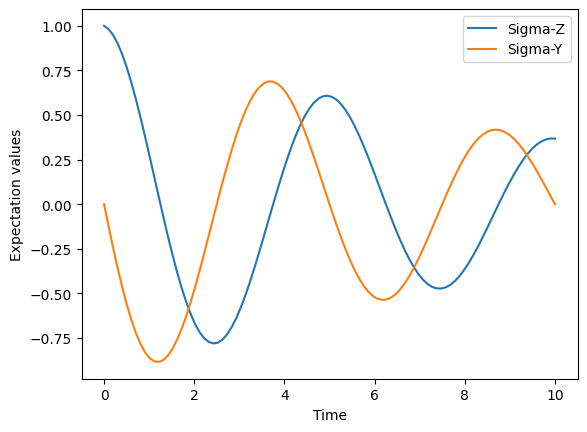

In [21]:
times = np.linspace(0.0, 10.0, 100)

result = mesolve(H, psi0, times, [np.sqrt(0.05) * sigmax()], [sigmaz(), sigmay()])

fig, ax = plt.subplots()

ax.plot(times, result.expect[0]) 

ax.plot(times, result.expect[1]) 

ax.set_xlabel('Time') 

ax.set_ylabel('Expectation values') 

ax.legend(("Sigma-Z", "Sigma-Y"))  

plt.show() 


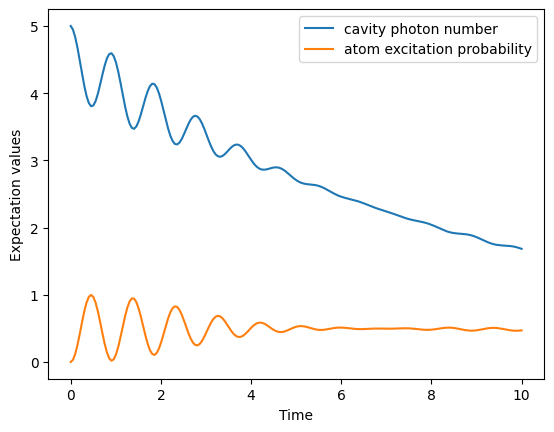

In [22]:
times = np.linspace(0.0, 10.0, 200)

psi0 = tensor(fock(2,0), fock(10, 5))

a  = tensor(qeye(2), destroy(10))

sm = tensor(destroy(2), qeye(10))

H = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)

result = mesolve(H, psi0, times, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])

plt.figure() 

plt.plot(times, result.expect[0]) 

plt.plot(times, result.expect[1]) 

plt.xlabel('Time') 

plt.ylabel('Expectation values') 

plt.legend(("cavity photon number", "atom excitation probability")) 

plt.show() 

In [23]:
# Can import the paper's Lindbladian here in QuTiP